# Running a Logistic Regression in PyTorch using the MNIST dataset

In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [2]:
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

# Examining the Dataset

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

In [4]:
train_dataset[0][0].numpy().shape #  first data point shape

(1, 28, 28)

**Picture of the first number in the training set**

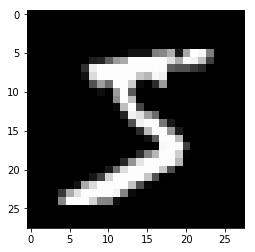

In [5]:
show_img = train_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap='gray') #

**Corresponding Label**

In [6]:
# Label
train_dataset[0][1]

tensor(5)

# Iterating Through the Data

DataLoader() is needed to iterate through the data for the model to train

In [7]:
batch_size = 100
n_iters = 12000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

# Creating the Model Class

In [8]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = self.linear(x)
        return out

# Instantiating the Model Class

In [9]:
input_dim = 28*28 # dimensions of the picture
output_dim = 10 # number of different labels (0-9)

model = LogisticRegressionModel(input_dim, output_dim)

In [10]:
# pass model to the gpu
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

# Instantiating the Loss Class

In [11]:
criterion = nn.CrossEntropyLoss() # cross entropy for LR

# Instantiating the Optimizer Class

In [12]:
learning_rate = 0.001

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

**Ensure GPU is available**

In [13]:
print(torch.cuda.is_available())
print(torch.cuda.current_device())
print(torch.cuda.get_device_name(0))

True
0
GeForce GTX 1070 with Max-Q Design


# Training the Model

In [14]:
iter = 0
print(device)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        
        # pass the data variables to the gpu
        images = images.view(-1, 28*28).requires_grad_().to(device)
        labels = labels.to(device)
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 1000 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                images = images.view(-1, 28*28).to(device)
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                # Total correct predictions need to be brought back to cpu
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()
            
            accuracy = 100 * correct.item() / total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

cuda:0
Iteration: 1000. Loss: 1.5309034585952759. Accuracy: 76.1
Iteration: 2000. Loss: 1.2043638229370117. Accuracy: 80.72
Iteration: 3000. Loss: 1.0866379737854004. Accuracy: 82.54
Iteration: 4000. Loss: 0.8732942938804626. Accuracy: 83.79
Iteration: 5000. Loss: 0.9083072543144226. Accuracy: 84.7
Iteration: 6000. Loss: 0.8351982831954956. Accuracy: 85.21
Iteration: 7000. Loss: 0.6754721999168396. Accuracy: 85.9
Iteration: 8000. Loss: 0.7295325994491577. Accuracy: 86.27
Iteration: 9000. Loss: 0.6505123972892761. Accuracy: 86.72
Iteration: 10000. Loss: 0.5348332524299622. Accuracy: 87.04
Iteration: 11000. Loss: 0.6077998876571655. Accuracy: 87.16
Iteration: 12000. Loss: 0.5633450150489807. Accuracy: 87.34


# Using a Logistic Regression I was able to achieve an 87.34% accuracy rate after 12 epochs